<a href="https://colab.research.google.com/github/ball-wch/Thai_NLP/blob/main/Thai_Transformers_(Bert).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thai Transformers (Bert) Tutorial for Super AI Engineer
How to use Huggingface Transformer Library for Thai Text.<br>
by<br>
Kobkrit Viriyayudhakorn, Ph.D.<br>
kobkrit@iapp.co.th<br>
https://ai.iapp.co.th<br>
<br>
Special Thanks to: PyThaiNLP, https://web.facebook.com/groups/thainlp/permalink/1255573951490759 (Tontan)

# GPU Instance Checking

In [ ]:
!nvidia-smi

Tue Jan 12 02:53:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()

True

# Install Library

In [ ]:
!pip -q install transformers

     |████████████████████████████████| 1.5MB 14.7MB/s 
     |████████████████████████████████| 890kB 54.5MB/s 
     |████████████████████████████████| 2.9MB 60.5MB/s 


In [ ]:
!pip -q install datasets

     |████████████████████████████████| 163kB 22.8MB/s 
     |████████████████████████████████| 17.7MB 207kB/s 
     |████████████████████████████████| 245kB 54.8MB/s 


# Thai BERT

ปัจจุบัน BERT มี pretrained 2 ตัว รองรับภาษาไทย ที่อยู่ใน transformers

- [bert-base-multilingual-uncased](https://huggingface.co/bert-base-multilingual-uncased) จาก Google
- [BERT-th](https://github.com/ThAIKeras/bert) จาก ThAIKeras โดย[คุณ Nick Doiron ได้นำมาแปลงใส่ลง transformers](https://huggingface.co/monsoon-nlp/bert-base-thai)
- [Geotrend/bert-base-th-cased](https://huggingface.co/Geotrend/bert-base-th-cased) Model from [Load What You Need: Smaller Versions of Multilingual BERT](https://arxiv.org/abs/2010.05609)

In [ ]:
from transformers import AutoTokenizer, AutoModel
from google.colab import widgets

In [ ]:
pretrained = "monsoon-nlp/bert-base-thai"#@param ["monsoon-nlp/bert-base-thai", "bert-base-multilingual-uncased", "Geotrend/bert-base-th-cased"] 

In [ ]:
name = pretrained

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(name, use_fast=True)
model = AutoModel.from_pretrained(name)

# Preprocessing

In [ ]:
text = ["ทดสอบ ใช้ งาน กับ BERT ภาษาไทย"]

In [ ]:
sent_id = tokenizer.batch_encode_plus(text, padding=True)

In [ ]:
print(sent_id)

{'input_ids': [[11, 157, 3827, 4665, 8417, 187, 5972, 5398, 142, 6081, 8085, 6251, 6294, 166, 2930, 8349, 5901, 12]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
text = ["ทดสอบใช้งานกับ BERT ภาษาไทย"]

In [ ]:
sent_id = tokenizer.batch_encode_plus(text, padding=True)

In [ ]:
print(sent_id)

{'input_ids': [[11, 157, 3827, 4665, 8417, 8487, 5972, 5398, 3316, 6081, 6326, 6251, 6294, 166, 2930, 8349, 5901, 12]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


# Fill Mask

In [ ]:
from transformers import pipeline

In [ ]:
unmasker = pipeline('fill-mask', model=name, tokenizer=tokenizer)

Some weights of BertModel were not initialized from the model checkpoint at Geotrend/bert-base-th-cased and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
unmasker("นายก รัฐมนตรี [MASK] เงิน")

[{'score': 0.1548023521900177,
  'sequence': '[CLS] นายก รัฐมนตรี คือ เงิน [SEP]',
  'token': 3695,
  'token_str': 'คือ'},
 {'score': 0.10158200562000275,
  'sequence': '[CLS] นายก รัฐมนตรี : เงิน [SEP]',
  'token': 39,
  'token_str': ':'},
 {'score': 0.053764790296554565,
  'sequence': '[CLS] นายก รัฐมนตรี ณ เงิน [SEP]',
  'token': 153,
  'token_str': 'ณ'},
 {'score': 0.050695884972810745,
  'sequence': '[CLS] นายก รัฐมนตรี ได้แก่ เงิน [SEP]',
  'token': 5528,
  'token_str': 'ได้แก่'},
 {'score': 0.04401557892560959,
  'sequence': '[CLS] นายก รัฐมนตรี เป็น เงิน [SEP]',
  'token': 7439,
  'token_str': 'เป็น'}]

In [ ]:
unmasker("เด็ก [MASK] เกม")

[{'score': 0.4483596384525299,
  'sequence': '[CLS] เด็กซ์ เกม [SEP]',
  'token': 7983,
  'token_str': '##ซ์'},
 {'score': 0.07773835957050323,
  'sequence': '[CLS] เด็ก ๆ เกม [SEP]',
  'token': 189,
  'token_str': 'ๆ'},
 {'score': 0.04331497848033905,
  'sequence': '[CLS] เด็ก! เกม [SEP]',
  'token': 14,
  'token_str': '!'},
 {'score': 0.026971321552991867,
  'sequence': '[CLS] เด็ก & เกม [SEP]',
  'token': 19,
  'token_str': '&'},
 {'score': 0.017711907625198364,
  'sequence': '[CLS] เด็กซี เกม [SEP]',
  'token': 8307,
  'token_str': '##ซี'}]

# Text Classification (Wongnai Dataset)

In [ ]:
!pip -q install simpletransformers

     |████████████████████████████████| 204kB 13.1MB/s 
     |████████████████████████████████| 7.5MB 12.2MB/s 
     |████████████████████████████████| 317kB 62.2MB/s 
     |████████████████████████████████| 1.2MB 64.4MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
     |████████████████████████████████| 1.9MB 48.5MB/s 
     |████████████████████████████████| 112kB 60.6MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
     |████████████████████████████████| 163kB 67.9MB/s 
     |████████████████████████████████| 4.5MB 59.0MB/s 
     |████████████████████████████████| 133kB 62.9MB/s 
     |████████████████████████████████| 102kB 14.6MB/s 
     |████████████████████████████████| 71kB 12.2MB/s 
     |████████████████████████████████| 122kB 66.5MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.4.3 which is incompatible.
ERROR: datasets 1.2.0 has requirement tqdm<4.50.0,>

In [ ]:
!pip -q install pythainlp

     |████████████████████████████████| 10.6MB 13.4MB/s 
     |████████████████████████████████| 747kB 54.4MB/s 


In [ ]:
from datasets import load_dataset
wongnai_ds = load_dataset('wongnai_reviews')

Using custom data configuration default


Dataset wongnai_reviews downloaded and prepared to /root/.cache/huggingface/datasets/wongnai_reviews/default/1.0.1/606484742fe0f96967d31a69a6f80c970828f89c08badf47d4a67737e65d1953. Subsequent calls will reuse this data.


In [ ]:
wongnai_ds

DatasetDict({
    train: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['review_body', 'star_rating'],
        num_rows: 6203
    })
})

In [ ]:
import numpy as np
import pandas as pd
num_labels = len(np.unique(np.array(wongnai_ds["train"]["star_rating"])))

In [ ]:
num_labels

5

In [ ]:
wongnai = pd.DataFrame(wongnai_ds["train"])

In [ ]:
wongnai_train = wongnai.sample(frac=0.2) #Very small dataset for speed
wongnai_eval = wongnai.sample(frac=0.05) #Very small dataset for speed

In [ ]:
from pythainlp.tokenize import word_tokenize
wongnai_train["text"] = wongnai_train["review_body"].apply(lambda x: ' '.join(word_tokenize(x)))
wongnai_train["labels"] = wongnai_train["star_rating"]
wongnai_train.labels = pd.Categorical(wongnai_train.labels)

In [ ]:
wongnai_train

review_body  ...  labels
16933  เป็นร้านที่อยู่ถนนเส้นหลักของซาปาอยู่พ้นหัวโค้...  ...       3
31756  มาเดินถนนคนเดินวัวลายวันเสาร์ ไม่เคยมาเลยค่ะ ค...  ...       3
1601   เรื่องขนม ไม่ค่อยสันทัด ดังนั้นขอreviewเฉพาะเร...  ...       3
1195   สวัสดีค่ะ วันนี้พาคุณหลานไปดูหนังก่อนดูหนังก็ไ...  ...       3
22777  สมคำร่ำลือจริงๆครับ ขายถูก เป็ดไม่มีกลิ่นสาบเล...  ...       3
...                                                  ...  ...     ...
25475  ร้านบรรยากาศแนวฝรั่ง นั่งชิวได้ ราคาสมเหตุสมผล...  ...       3
25974  เนื่องจากอยากทานสุกี้ Mo Mo แต่กระเพาะเริ่มรับ...  ...       3
1831   วันนี้ หนีมาทานอาหารเที่ยงตอนบ่าย\n55555555 แบ...  ...       2
2192   ไก่แซ่บ 75 บาท\nคอหมูย่าง 75 บาท\nยำผักหวานกุ้...  ...       3
27946  ร้านก๋วยเตี๋ยวหมูตุ๋นเจ้าเก่าดั้งเดิม ด้วยประส...  ...       3

[8000 rows x 4 columns]

In [ ]:
wongnai_train.sample(n=100)

review_body  ...  labels
27485  สตาร์บัคที่ห้างนี้ตอนเช็คอินต้องดูดีๆนะคะ เพรา...  ...       3
23386  ร้านอาหารเช้านั่งสบายๆ เมนูหลากหลาย ติ่มซำเลือ...  ...       2
13909  ร้านนี้เป็นร้านดปรดผมร้านหนึ่งเลยครับไปทานบ่อย...  ...       3
25071  อยากกินข้าวมันไก่ก๋วยเตี๋ยวไก่มาเลย ราคาไม่แรง...  ...       3
7608   เป็นร้านบุฟเฟ่คนละ 265 บาท ทานได้ 90นาที มีอาห...  ...       4
...                                                  ...  ...     ...
7898   คุณภาพเนื้อย่าง / ชาบู พอรับได้ น้ำจิ้มอร่อย ร...  ...       0
13449  ร้านอยู่ถ.นราธิวาส ระหว่างซ.15-17\nขายอาหารไทย...  ...       2
39557  ร้านนี้จะอยู่ที่ชั้น 1 ติดกับเชสเตอร์กริล เป็น...  ...       3
2905   ร้านเลม่อนทรี ขื่อนี้หลายๆคนชาวเชียงใหม่อาจจะเ...  ...       4
31025  [กทม.] ร้าน User' choice 2016  ที่ได้มาลิ้มลอง...  ...       4

[100 rows x 4 columns]

In [ ]:
wongnai_eval["text"] = wongnai_eval["review_body"].apply(lambda x: ' '.join(word_tokenize(x)))
wongnai_eval["labels"] = wongnai_eval["star_rating"]
wongnai_eval.labels = pd.Categorical(wongnai_eval.labels)

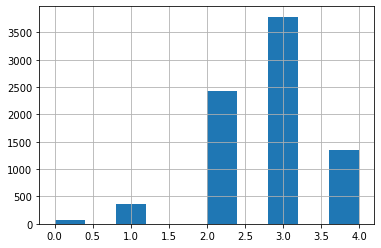

In [ ]:
wongnai_train["labels"].hist()

In [ ]:
wongnai_train = pd.concat([
  wongnai_train[wongnai_train["labels"]==0].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==1].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==2].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==3].sample(n=500,replace=True),
  wongnai_train[wongnai_train["labels"]==4].sample(n=500,replace=True),
  ],axis=0)


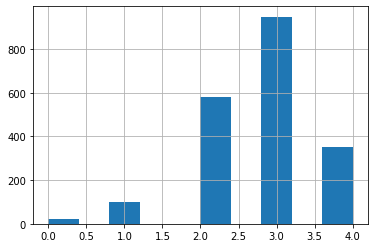

In [ ]:
wongnai_eval["labels"].hist()

In [ ]:
wongnai_eval[wongnai_eval["labels"]==0].sample(n=100, replace=True)

review_body  ...  labels
13712  เคยได้ยินชื่อเสียงมาบ้าง สำหรับร้านตระกูล ลำพู...  ...       0
18869  ร้านน้ำปั่นพันแรงม้า มีน้ำผลไม้ น้ำปั่นทั่วไป ...  ...       0
18869  ร้านน้ำปั่นพันแรงม้า มีน้ำผลไม้ น้ำปั่นทั่วไป ...  ...       0
6880   ร้านกาแฟในเมืองจันท์เยอะมาก และอร่อย บรรยากาศด...  ...       0
15177  เคยเป็นร้านโปรดยามดึกมาหลายปี วันนี้เลยอยากกลั...  ...       0
...                                                  ...  ...     ...
5795   เป็นร้านที่ดูน่านั้งดี แต่แค่ดูเหมือนนะ \nรู้ส...  ...       0
31965  ให้ไปอีกคงคิดหนักค่ะ ของไม่สดเลยเหม็นคาวมากๆ ร...  ...       0
2276   สำหรับข้าวมันไก่ร้านนี้.  กินหนเดียวเลิกเข้าแล...  ...       0
216    สวัสดีค่ะ เพื่อนๆชาวนักกินทุกคน^^\nไม่ได้เจอกั...  ...       0
6880   ร้านกาแฟในเมืองจันท์เยอะมาก และอร่อย บรรยากาศด...  ...       0

[100 rows x 4 columns]

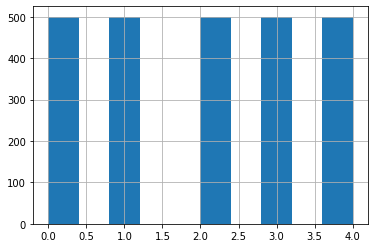

In [ ]:
wongnai_train["labels"].hist()

In [ ]:
# model
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn

# model_args = ClassificationArgs()
# model_args.custom_parameter_groups = [
#     {
#         "params": ["classifier.weight", "bert.encoder.layer.10.output.dense.weight"],
#         "lr": 1e-2,
#     }
# ]

model_args = {
    "reprocess_input_data": True,
    'train_batch_size':32,
    "use_early_stopping": True,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 5,
    "evaluate_during_training_steps": 500,
    "fp16": False,
    "overwrite_output_dir":True,
    'use_cached_eval_features' : False, 
    'max_seq_length': 256,
    'no_cache': True,
    "num_train_epochs":3,
    'custom_parameter_groups':[{
        "params": ["classifier.weight", "bert.encoder.layer.10.output.dense.weight"],
        "lr": 1e-2,
    }]
}

model = ClassificationModel(
     "bert", 
     name,
     use_cuda=torch.cuda.is_available(), 
     args=model_args, 
     num_labels=num_labels,
)
model.train_model(wongnai_train, show_running_loss = True, eval_df=wongnai_eval, acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(237, 1.5749760066406637)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(wongnai_eval)

In [ ]:
result

{'eval_loss': 1.4479334297180175, 'mcc': 0.04025855591999679}

In [ ]:
model_outputs

array([[-3.39030552, -1.01464522,  1.3454212 ,  1.38678885,  1.23238015],
       [-1.91385674, -0.08835871,  0.60852706,  0.55541503,  0.54083765],
       [-2.44274902, -0.37346274,  0.86153895,  0.82673997,  0.77455765],
       ...,
       [-3.73690581, -1.27294242,  1.53122079,  1.60417736,  1.40819585],
       [-2.27604532, -0.29488549,  0.78351337,  0.75630397,  0.70653039],
       [-2.35998559, -0.32634699,  0.82143778,  0.78117758,  0.73525006]])

In [ ]:
len(wrong_predictions)

1424

In [ ]:
model.predict(["ห่วย แตก กิน ไม่ ได้ เลย ขอ บอก อาหาร เน่า มาก กลิ่น เหม็น มี แมลง สาบ มารยาท ทราม สุด ๆ"])

(array([1]),
 array([[ 0.873555  ,  1.18253183, -0.58890367, -0.75567037, -0.66193104]]))

In [ ]:
model.predict(["ร่้าน นี้ อาหาร เยี่ยม มาก สุดยอด ประทับ ใจ ที่จอดรถ ใหญ่ ตั้งใจ ทำงาน มาก เลย"])

(array([3]),
 array([[-3.35214853, -1.01963329,  1.33107769,  1.38710809,  1.23274338]]))

In [ ]:
model.predict(list(wongnai_train['text'])[:10])

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0]),
 array([[ 1.6371932 ,  1.45354295, -0.8853513 , -1.0742687 , -0.97507089],
        [ 3.22071981,  1.91347265, -1.45208907, -1.6721133 , -1.5928905 ],
        [ 2.77339363,  1.77594781, -1.29184771, -1.48776078, -1.41897964],
        [ 4.11308002,  2.09886146, -1.76287472, -1.94773352, -1.90388906],
        [ 2.96268654,  1.8564496 , -1.36078429, -1.58161008, -1.50239313],
        [ 0.17238848,  0.93829805, -0.3058973 , -0.47092724, -0.38381097],
        [ 0.4053857 ,  1.04630888, -0.40595925, -0.58900189, -0.4894135 ],
        [ 0.58257288,  1.12767231, -0.4744184 , -0.67593545, -0.57178295],
        [ 0.78663421,  1.19904971, -0.55393302, -0.75695914, -0.65382177],
        [ 1.76895475,  1.47583222, -0.93138742, -1.11291111, -1.01971328]]))

In [ ]:
list(wongnai_train['labels'])[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Text Classification with Custom Dataset (True Voice Intent)

### Preprocessing

In [ ]:
!git clone https://github.com/kobkrit/truevoice-intent

fatal: destination path 'truevoice-intent' already exists and is not an empty directory.


In [ ]:
%cd /content

/content


In [ ]:
!unzip truevoice-intent/mari-intent.zip

Archive:  truevoice-intent/mari-intent.zip
  inflating: mari_test.csv           
  inflating: mari_train.csv          


In [ ]:
!ls

mari_test.csv  mari_train.csv  outputs	runs  sample_data  truevoice-intent


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
#tv = true_voice
train_valid_tv_df = pd.read_csv(f'mari_train.csv')
test_tv_df = pd.read_csv(f'mari_test.csv')


In [ ]:
train_valid_tv_df.describe()

texts  ...          destination
count                  12939  ...                12939
unique                 11398  ...                    7
top     สอบถามยอดค้างชำระค่ะ  ...  billing and payment
freq                      10  ...                 5007

[4 rows x 5 columns]

In [ ]:
test_tv_df.describe()

texts  texts_deepcut   action    object          destination
count          3236           3236     3236      3236                 3236
unique         2003           2003        8        24                    7
top     บริการอื่นๆ  บริการ อื่น ๆ  enquire  internet  billing and payment
freq             97             97     2351       524                  977

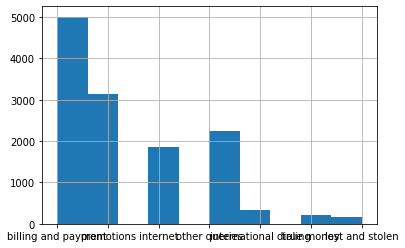

In [ ]:
train_valid_tv_df["destination"].hist()

In [ ]:
# Fix Imblanace dataset here.

### Dataset Construction

In [ ]:
# Label encoder
from sklearn import preprocessing
tv_le = preprocessing.LabelEncoder()
tv_le.fit(list(test_tv_df['destination']))

LabelEncoder()

In [ ]:
train_tv_df, val_tv_df = train_test_split(train_valid_tv_df, test_size=0.15, random_state=23)
train_tv_df.head()

texts  ...          destination
8106                            ผมจะยกเลิกข้อความอ่ะครับ  ...        other queries
9586                       พี่คะเมื่อวานสมัครเน็ตหน่ะค่ะ  ...             internet
8606   พอเวลาติดต่อน้อง คุณผู้หญิงคนนั้นให้กดเบอร์ คื...  ...             internet
5083   จะยกเลิกบริการครับ ไม่ได้ใช้งานเลย แต่มีใบเสร็...  ...  billing and payment
11454    สอบถามเรื่องจานค่ะ ปรับคุณภาพแล้ว ปรับไม่ได้ค่ะ  ...        other queries

[5 rows x 5 columns]

In [ ]:
train_tv_df["text"] = train_tv_df["texts_deepcut"]
train_tv_df["labels"] = tv_le.transform(train_tv_df["destination"])
val_tv_df["text"] = val_tv_df["texts_deepcut"]
val_tv_df["labels"] = tv_le.transform(val_tv_df["destination"])
test_tv_df["text"] = test_tv_df["texts_deepcut"]
test_tv_df["labels"] = tv_le.transform(test_tv_df["destination"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
train_tv_df

texts  ... labels
8106                            ผมจะยกเลิกข้อความอ่ะครับ  ...      4
9586                       พี่คะเมื่อวานสมัครเน็ตหน่ะค่ะ  ...      2
8606   พอเวลาติดต่อน้อง คุณผู้หญิงคนนั้นให้กดเบอร์ คื...  ...      2
5083   จะยกเลิกบริการครับ ไม่ได้ใช้งานเลย แต่มีใบเสร็...  ...      0
11454    สอบถามเรื่องจานค่ะ ปรับคุณภาพแล้ว ปรับไม่ได้ค่ะ  ...      4
...                                                  ...  ...    ...
9704                        พี่จะยกเลิกเสียงเพลงรอสายค่ะ  ...      4
11190           สอบถาม internet ที่สมัครใช้งานอย่างไรค่ะ  ...      5
10185                    รบกวนเช็คค่าบริการอินเตอร์เน็ต   ...      0
9256                 พอดีว่าจะเปลี่ยนโปรค่ะเป๊น นาที ค่ะ  ...      5
8787   พอดีใช้ไอแพคของทรู แต่จำเบอร์ไม่ได้ ตอนนี้ไม่ข...  ...      2

[10998 rows x 7 columns]

In [ ]:
num_labels = len(np.unique(np.array(train_tv_df["labels"])))

In [ ]:
num_labels

7

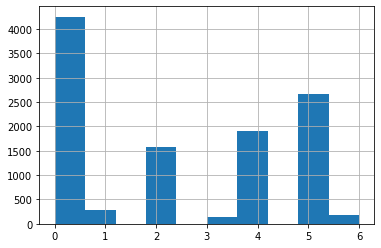

In [ ]:
train_tv_df["labels"].hist()

In [ ]:
model_args = {
    "reprocess_input_data": True,
    'train_batch_size':32,
    "use_early_stopping": True,
    "early_stopping_delta": 0.01,
    "early_stopping_metric": "mcc",
    "early_stopping_metric_minimize": False,
    "early_stopping_patience": 5,
    "evaluate_during_training_steps": 500,
    "fp16": False,
    "num_train_epochs":3,
    "overwrite_output_dir":True
}

model = ClassificationModel(
     "bert", 
     name,
     use_cuda=torch.cuda.is_available(), 
     args=model_args, 
     num_labels=num_labels,
)
model.train_model(train_tv_df, show_running_loss = True, eval_df=val_tv_df, acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(1032, 0.7868346037964026)

In [ ]:
model.predict(list(val_tv_df['text'])[:10])

(array([5, 5, 0, 5, 0, 3, 5, 0, 5, 0]),
 array([[ 1.96267712, -2.48104405,  0.79276669, -1.84018779,  2.49539042,
          3.24331021, -3.71231866],
        [ 2.27809954, -2.50641537,  1.26558435, -2.6936183 ,  1.74348569,
          3.7601788 , -3.3296895 ],
        [ 4.81156826, -2.2873261 , -0.32993594, -2.99692822, -0.93528205,
          0.23024976,  0.88642061],
        [ 0.09613834, -0.03668531,  0.64157474, -3.51926994,  2.30219126,
          2.79695225, -2.33899546],
        [ 2.994802  , -3.40298414,  1.16237926, -2.56958365, -0.39549032,
         -1.01564419,  1.98293161],
        [ 0.9130196 , -1.09167027, -1.53297532,  4.22835779,  1.87009835,
         -1.67350733, -1.50158906],
        [-0.46961838, -1.27459502,  0.75468159, -2.20135164, -0.61505497,
          5.40124512, -1.61101735],
        [ 4.8396554 , -0.98744774,  0.15502827, -3.7309432 , -1.1811173 ,
          0.30563253,  0.05869421],
        [ 0.34781921, -1.67602968,  0.72314686, -2.24294472, -0.45942149,
      

In [ ]:
list(val_tv_df['labels'])[:10]

[4, 5, 0, 5, 0, 3, 5, 0, 5, 0]

# Thai Question Answering (Thai QA)


## Data pre-processing

In [ ]:
from datasets import load_dataset
thaiqa_ds = load_dataset('thaiqa_squad')

Dataset thaiqa_squad downloaded and prepared to /root/.cache/huggingface/datasets/thaiqa_squad/thaiqa_squad/1.0.0/7b7e2b91d89dc82fb5f3daebad1f7760eff94f7df63eaee9c8de1dd700c090b9. Subsequent calls will reuse this data.


In [ ]:
thaiqa_ds

DatasetDict({
    train: Dataset({
        features: ['question_id', 'article_id', 'context', 'question', 'answers'],
        num_rows: 4000
    })
    validation: Dataset({
        features: ['question_id', 'article_id', 'context', 'question', 'answers'],
        num_rows: 74
    })
})

In [ ]:
import pandas as pd
qa_train = pd.DataFrame(thaiqa_ds["train"])

In [ ]:
qa_train

answers  ...  question_id
0     {'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...  ...            1
1     {'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...  ...         2035
2     {'answer': ['เมชตา'], 'answer_begin_position':...  ...            2
3     {'answer': ['ลมสุริยะ'], 'answer_begin_positio...  ...            3
4     {'answer': ['ปี 1933'], 'answer_begin_position...  ...            4
...                                                 ...  ...          ...
3995  {'answer': ['นครราชสีมา'], 'answer_begin_posit...  ...         3996
3996  {'answer': ['ดอกสาธร'], 'answer_begin_position...  ...         3997
3997  {'answer': ['ราบัต'], 'answer_begin_position':...  ...         3998
3998  {'answer': ['2532'], 'answer_begin_position': ...  ...         3999
3999  {'answer': ['วิชัย ศรีวัฒนประภา'], 'answer_beg...  ...         4000

[4000 rows x 5 columns]

In [ ]:
qa_train["context"]

0       <doc id="115035" url="https://th.wikipedia.org...
1       <doc id="115035" url="https://th.wikipedia.org...
2       <doc id="376583" url="https://th.wikipedia.org...
3       <doc id="376583" url="https://th.wikipedia.org...
4       <doc id="547560" url="https://th.wikipedia.org...
                              ...                        
3995    <doc id="5114" url="https://th.wikipedia.org/w...
3996    <doc id="5114" url="https://th.wikipedia.org/w...
3997    <doc id="20722" url="https://th.wikipedia.org/...
3998    <doc id="355975" url="https://th.wikipedia.org...
3999    <doc id="355975" url="https://th.wikipedia.org...
Name: context, Length: 4000, dtype: object

In [ ]:
qa_train["context"][0]

'<doc id="115035" url="https://th.wikipedia.org/wiki?curid=115035" title="เบนจี้">เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji\'s Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji\'s Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji, Zax & t

In [ ]:
from lxml import etree
parser = etree.XMLParser(recover=True)
tree = etree.fromstring(qa_train["context"][0], parser=parser)
print(tree.tag)
print(tree.attrib)
print(tree.text)

doc
{'id': '115035', 'url': 'https://th.wikipedia.org/wiki?curid=115035', 'title': 'เบนจี้'}
เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji's Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji's Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji

In [ ]:
def extract_text(body):
  tree = etree.fromstring(body, parser=parser)
  return tree.text

In [ ]:
extract_text(qa_train["context"][0])

"เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู้ ที่ปรากฏอยู่ในภาพยนตร์หลายเรื่องที่เขียนบท และกำกับโดย โจ แคมป์ ในช่วงทศวรรษ 1970 ถึง 1980 ภาพยนตร์เรื่องแรกในชุด ใช้ชื่อเรื่องว่า เบนจี้ เช่นเดียวกับตัวละคร ถ่ายทำที่เมืองดัลลัส รัฐเทกซัส ฉายครั้งแรกในปี พ.ศ. 2517 ภาพยนตร์ได้รับการเสนอชื่อเข้าชิงรางวัลออสการ์ และได้รางวัลลูกโลกทองคำ สาขาเพลงประกอบยอดเยี่ยม จากเพลง Benji's Theme (I Feel Love) ร้องโดย ชาร์ลี ริช หมาที่แสดงเป็นเบนจี้ตัวแรก ชื่อว่า ฮิกกิ้นส์ (พ.ศ. 2502 - พ.ศ. 2518) มีอายุถึง 15 ปีแล้วในขณะแสดง หลังจากภาพยนตร์ออกฉายได้ไม่นาน มันก็ตายในปี พ.ศ. 2518เบนจี้ในภาพยนตร์เบนจี้ในภาพยนตร์. - พ.ศ. 2517, Benji (ภาพยนตร์) - พ.ศ. 2520, For the Love of Benji (ภาพยนตร์) - พ.ศ. 2521, Benji's Very Own Christmas Story (ภาพยนตร์โทรทัศน์) - พ.ศ. 2523, Oh Heavenly Dog (ภาพยนตร์) - พ.ศ. 2523, Benji at Work (ภาพยนตร์โทรทัศน์) - พ.ศ. 2524, Benji Takes a Dive at Marineland (ภาพยนตร์โทรทัศน์) - พ.ศ. 2526, Benji, Zax  the Alien Prince (ภาพยนตร์ซีรีส์) - พ.ศ. 2530, Benji the Hunted (ภาพยนตร์) - พ.ศ. 254

In [ ]:
qa_train["context_text"] = qa_train["context"].apply(extract_text)

In [ ]:
qa_train.head()

answers  ...                                       context_text
0  {'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...  ...  เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...
1  {'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...  ...  เบนจี้ เบนจี้ () เป็นชื่อตัวละครหมาพันทางแสนรู...
2  {'answer': ['เมชตา'], 'answer_begin_position':...  ...  ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...
3  {'answer': ['ลมสุริยะ'], 'answer_begin_positio...  ...  ลูนา 1 ลูนา 1 (อี-1 ซีรีส์) ซึ่งในขณะนั้นรู้จั...
4  {'answer': ['ปี 1933'], 'answer_begin_position...  ...  กระทรวงโฆษณาแถลงข่าวและโฆษณาชวนเชื่อ กระทรวงโฆ...

[5 rows x 8 columns]

In [ ]:
from pythainlp.tokenize import word_tokenize
qa_train["context_text_wordsegged"] = qa_train["context_text"].apply(lambda x: ' '.join(word_tokenize(x)))

In [ ]:
qa_train["question_wordsegged"] = qa_train["question"].apply(lambda x: ' '.join(word_tokenize(x)))

In [ ]:
qa_train.head()

answers  ...                                question_wordsegged
0  {'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...  ...  สุนัข ตัว แรก รับบท เป็น เบน จี้ ใน ภาพยนตร์ เ...
1  {'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...  ...  เพลง   Benji ' s   Theme   ใช้ ประกอบ ภาพยนตร์...
2  {'answer': ['เมชตา'], 'answer_begin_position':...  ...  ลู นา   1   เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
3  {'answer': ['ลมสุริยะ'], 'answer_begin_positio...  ...  ลู นา   1   เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
4  {'answer': ['ปี 1933'], 'answer_begin_position...  ...  กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ ของ น...

[5 rows x 10 columns]

In [ ]:
qa_train["answers_wordsegged"] =  qa_train["answers"].apply(lambda x: ' '.join(word_tokenize(x["answer"][0])))

In [ ]:
qa_train.head()

answers  ...                                question_wordsegged
0  {'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...  ...  สุนัข ตัว แรก รับบท เป็น เบน จี้ ใน ภาพยนตร์ เ...
1  {'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...  ...  เพลง   Benji ' s   Theme   ใช้ ประกอบ ภาพยนตร์...
2  {'answer': ['เมชตา'], 'answer_begin_position':...  ...  ลู นา   1   เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
3  {'answer': ['ลมสุริยะ'], 'answer_begin_positio...  ...  ลู นา   1   เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
4  {'answer': ['ปี 1933'], 'answer_begin_position...  ...  กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ ของ น...

[5 rows x 10 columns]

In [ ]:
answer_starts = []
for idx, row in qa_train.iterrows():
  try:
    answer_start = row["context_text_wordsegged"].index(row["answers_wordsegged"])
  except:
    answer_start = -1
  answer_starts.append(answer_start)

In [ ]:
qa_train["answer_starts"] = answer_starts

In [ ]:
qa_train.tail()

answers  ...                                question_wordsegged
3995  {'answer': ['นครราชสีมา'], 'answer_begin_posit...  ...      จังหวัด ใด มี พื้นที่ มาก ที่สุด ในประเทศ ไทย
3996  {'answer': ['ดอกสาธร'], 'answer_begin_position...  ...  ดอกไม้ ประจำจังหวัด นครราชสีมา ในประเทศ ไทย คื...
3997  {'answer': ['ราบัต'], 'answer_begin_position':...  ...      เมืองหลวง ของ ประเทศ โมร็อกโก มี ชื่อว่า อะไร
3998  {'answer': ['2532'], 'answer_begin_position': ...  ...  กลุ่ม บริษัท   คิง   เพาเวอร์   เป็น บริษัท ด้...
3999  {'answer': ['วิชัย ศรีวัฒนประภา'], 'answer_beg...  ...  ใคร คือ ผู้ก่อตั้ง บริษัท ด้าน ธุรกิจ ค้าปลีก ...

[5 rows x 10 columns]

## Stanford Question Answering Dataset (SQuAD) format
https://simpletransformers.ai/docs/qa-data-formats/
---


```python
train_data = [
    {
        "context": "Mistborn is a series of epic fantasy novels written by American author Brandon Sanderson.",
        "qas": [
            {
                "id": "00001",
                "is_impossible": False,
                "question": "Who is the author of the Mistborn series?",
                "answers": [
                    {
                        "text": "Brandon Sanderson",
                        "answer_start": 71,
                    }
                ],
            }
        ],
    },
    {
        "context": "The first series, published between 2006 and 2008, consists of The Final Empire,"
                   "The Well of Ascension, and The Hero of Ages.",
        "qas": [
            {
                "id": "00002",
                "is_impossible": False,
                "question": "When was the series published?",
                "answers": [
                    {
                        "text": "between 2006 and 2008",
                        "answer_start": 28,
                    }
                ],
            },
            {
                "id": "00003",
                "is_impossible": False,
                "question": "What are the three books in the series?",
                "answers": [
                    {
                        "text": "The Final Empire, The Well of Ascension, and The Hero of Ages",
                        "answer_start": 63,
                    }
                ],
            },
            {
                "id": "00004",
                "is_impossible": True,
                "question": "Who is the main character in the series?",
                "answers": [],
            },
        ],
    },
]

```



In [ ]:
qa_train.head()

answers  ...                                question_wordsegged
0  {'answer': ['ฮิกกิ้นส์'], 'answer_begin_positi...  ...  สุนัข ตัว แรก รับบท เป็น เบน จี้ ใน ภาพยนตร์ เ...
1  {'answer': ['ชาร์ลี ริช'], 'answer_begin_posit...  ...  เพลง   Benji ' s   Theme   ใช้ ประกอบ ภาพยนตร์...
2  {'answer': ['เมชตา'], 'answer_begin_position':...  ...  ลู นา   1   เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
3  {'answer': ['ลมสุริยะ'], 'answer_begin_positio...  ...  ลู นา   1   เป็น ยานอวกาศ ลำ แรก ใน โครงการ ลู...
4  {'answer': ['ปี 1933'], 'answer_begin_position...  ...  กระทรวง โฆษณา แถลงข่าว และ โฆษณาชวนเชื่อ ของ น...

[5 rows x 10 columns]

In [ ]:
train_data = []
for idx, row in qa_train.iterrows():
  doc = {}
  doc["context"] = row["context_text_wordsegged"]
  doc["qas"] = [{"id":idx, "is_impossible":row["answer_starts"]<0,"question":row["question_wordsegged"],"answers":[{"text":row["answers_wordsegged"], "answer_start":row["answer_starts"]}]}]
  train_data.append(doc)

In [ ]:
train_data

[{'context': "เบน จี้   เบน จี้   ()   เป็น ชื่อ ตัวละคร หมา พันทาง แสนรู้   ที่ ปรากฏ อยู่ ใน ภาพยนตร์ หลาย เรื่อง ที่ เขียน บท   และ กำกับ โดย   โจ   แคมป์   ใน ช่วง ทศวรรษ   1970   ถึง   1980   ภาพยนตร์ เรื่อง แรก ใน ชุด   ใช้ ชื่อเรื่อง ว่า   เบน จี้   เช่นเดียวกับ ตัวละคร   ถ่ายทำ ที่ เมือง ดัลลัส   รัฐ เทกซัส   ฉาย ครั้งแรก ใน ปี   พ.ศ.   2517   ภาพยนตร์ ได้รับ การ เสนอชื่อ เข้า ชิง รางวัล ออสการ์   และ ได้ รางวัล ลูกโลก ทองคำ   สาขา เพลง ประกอบ ยอดเยี่ยม   จาก เพลง   Benji ' s   Theme   ( I   Feel   Love )   ร้อง โดย   ชาร์ลี   ริ ช   หมา ที่ แสดง เป็น เบน จี้ ตัว แรก   ชื่อว่า   ฮิ กกิ้นส์   ( พ.ศ.   2502   -   พ.ศ.   2518 )   มีอายุ ถึง   15   ปี แล้ว ใน ขณะ แสดง   หลังจาก ภาพยนตร์ ออก ฉาย ได้ ไม่ นาน   มัน ก็ ตาย ใน ปี   พ.ศ.   2518 เบน จี้ ใน ภาพยนตร์ เบน จี้ ใน ภาพยนตร์ .   -   พ.ศ.   2517,   Benji   ( ภาพยนตร์ )   -   พ.ศ.   2520,   For   the   Love   of   Benji   ( ภาพยนตร์ )   -   พ.ศ.   2521,   Benji ' s   Very   Own   Christmas   Story   ( ภาพยนตร์โทรทัศน์ )   -   พ.ศ.

## Finetuning

In [ ]:
from simpletransformers.question_answering import QuestionAnsweringModel,QuestionAnsweringArgs


# Configure the model
model_args = QuestionAnsweringArgs()
model_args.train_batch_size = 32
model_args.evaluate_during_training = True
model_args.num_train_epochs = 3
model_args.overwrite_output_dir = True

# model_args = {
#     "reprocess_input_data": True,
#     'train_batch_size':32,
#     "use_early_stopping": True,
#     "early_stopping_delta": 0.01,
#     "early_stopping_metric": "mcc",
#     "early_stopping_metric_minimize": False,
#     "early_stopping_patience": 5,
#     "evaluate_during_training_steps": 500,
#     "fp16": False,
#     "num_train_epochs":3,
#     "overwrite_output_dir":True
# }

model = QuestionAnsweringModel(
    "bert", name, args=model_args
)

# Train the model
model.train_model(train_data, eval_data=train_data)

# Evaluate the model
result, texts = model.eval_model(train_data)

Some weights of the model checkpoint at monsoon-nlp/bert-base-thai were not used when initializing BertForQuestionAnswering: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initialized from th

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)
add example index and unique id: 100%|██████████| 4000/4000 [00:00<00:00, 428022.96it/s]


add example index and unique id: 100%|██████████| 4000/4000 [00:00<00:00, 286657.71it/s]


add example index and unique id: 100%|██████████| 4000/4000 [00:00<00:00, 418823.11it/s]


add example index and unique id: 100%|██████████| 4000/4000 [00:00<00:00, 407847.53it/s]


In [ ]:
# kobkrit@iapp.co.th